# Introduction 

The below code is a modified version of The-Pandas-Workshop material with more examples

## What is it

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way toward this goal.

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.

## Main Features

Here are just a few of the things that pandas does well:

* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Hierarchical labeling of axes (possible to have multiple labels per tick)
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving/loading data from the ultrafast HDF5 format
* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

The goal of this chapter is to introduce a foundation of pandas by thoroughly inspecting the Series and DataFrame data structures. It is vital for pandas users to know each component of the Series and the DataFrame, and to understand that each column of data in pandas holds precisely one data type.

In this chapter, you will learn how to select a single column of data from a DataFrame, which is returned as a Series. Working with this one-dimensional object makes it easy to show how different methods and operators work. Many Series methods return another Series as output. This leads to the possibility of calling further methods in succession, which is known asmethod chaining.

The Index component of the Series and DataFrame is what separates pandas from most other data analysis libraries and is the key to understanding how many operations work. We will get a glimpse of this powerful object when we use it as a meaningful label for Series values. The final two recipes contain simple tasks that frequently occur during a data analysis.

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display

# Recipes
* [Understanding the anatomy of a DataFrame](#Understanding-the-anatomy-of-a-DataFrame)
* [Accessing the main DataFrame components](#Accessing-the-main-DataFrame-components)
* [Understanding data types](#Understanding-data-types)
* [Selecting a single Series](#Selecting-a-single-Series)
* [Calling Series methods](#Calling-Series-methods)
* [Working with operators on a Series](#Working-with-operators-on-a-Series)
* [Chaining Series methods together](#Chaining-Series-methods-together)
* [Making a meaningful index](#Making-a-meaningful-index)
* [Renaming row and column labels](#Renaming-row-and-column-labels)
* [Creating and deleting columns](#Creating-and-deleting-columns)

## change options for each recipe

In [5]:
pd.set_option('display.max_columns', 8, 'display.max_rows', 10)

# Understanding the anatomy of a DataFrame

Before diving deep into pandas, it is worth knowing the components of the DataFrame. Visually, the outputted display of a pandas DataFrame (in a Jupyter Notebook) appears to be nothing more than an ordinary table of data consisting of rows and columns. Hiding beneath the surface are the three components--`the index, columns, and data` (also known as values) that you must be aware of in order to maximize the DataFrame's full potential.

In [6]:
movie = pd.read_csv('data/movie.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0


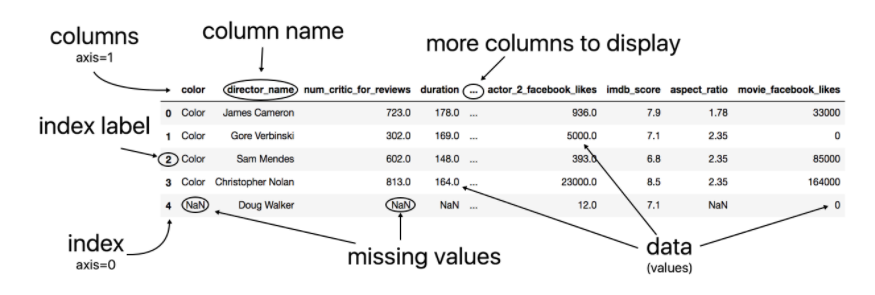

Pandas first reads the data from disk into memory and into a DataFrame using the excellent and versatile `read_csv` function. The output for both the columns and the index is in bold font, which makes them easy to identify. By convention, the terms index label and column name refer to the individual members of the index and columns, respectively. The term index refers to all the index labels as a whole just as the term columns refers to all the column names as a whole.

The columns and the index serve a particular purpose, and that is to provide labels for the columns and rows of the DataFrame. These labels allow for direct and easy access to different subsets of data. When multiple Series or DataFrames are combined, the indexes align first before any calculation occurs. Collectively, the columns and the index are known as the axes.

**Note**

* A DataFrame has two axes--a vertical axis (the index) and a horizontal axis(the columns). Pandas borrows convention from NumPy and uses the integers 0/1 as another way of referring to the vertical/horizontal axis.

DataFrame data (values) is always in regular font and is an entirely separate component from the columns or index. `Pandas uses NaN (not a number) to represent missing values`. Notice that even though the color column has only string values, it uses NaN to represent a missing value.

The three consecutive dots in the middle of the columns indicate that there is at least one column that exists but is not displayed due to the number of columns exceeding the predefined display limits.

**Note**

* The Python standard library contains the csv module, which can be used to parse and read in data. The pandas read_csv function offers a powerful increase in performance and functionality over this module

# Accessing the main DataFrame components

Each of the three DataFrame components--`the index, columns, and data`--may be accessed directly from a DataFrame. Each of these components is itself a Python object with its own unique attributes and methods. It will often be the case that you would like to perform operations on the individual components and not on the DataFrame as a whole.

This recipe extracts the index, columns, and the data of the DataFrame into separate variables, and then shows how the columns and index are inherited from the same object.

In [7]:
columns = movie.columns
index = movie.index
data = movie.values

In [8]:
columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
index

RangeIndex(start=0, stop=4916, step=1)

In [10]:
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

You may access the three main components of a DataFrame with the index, columns, and values attributes. The output of the columns attribute appears to be just a sequence of the column names. This sequence of column names is technically an Index object. The output of the function type is the fully qualified class name of the object.

**Note**

The fully qualified class name of the object for the variable columns is pandas.core.indexes.base.Index. It begins with the package name, which is followed by a path of modules and ends with the name of the type. A common way of referring to objects is to include the package name followed by the name of the object type. In this instance, we would refer to the columns as a pandas Index object.

`The built-in subclass function checks whether the first argument inherits from the second`. The Index and RangeIndex objects are very similar, and in fact, pandas has a number of similar objects reserved specifically for either the index or the columns. The index and the columns must both be some kind of Index object. Essentially, the index and the columns represent the same thing, but along different axes. They’re occasionally referred to as the row index and column index.

**Note**

In this context, the Index objects refer to all the possible objects that can be used for the index or columns. `They are all subclasses of pd.Index. Here is the complete list of the Index objects: CategoricalIndex, MultiIndex, IntervalIndex, Int64Index, UInt64Index, Float64Index, RangeIndex, TimedeltaIndex, DatetimeIndex, PeriodIndex.`

`A RangeIndex is a special type of Index object that is analogous to Python's range object. Its entire sequence of values is not loaded into memory until it is necessary to do so, thereby saving memory. It is completely defined by its start, stop, and step values.`

In [12]:
index.values

array([   0,    1,    2, ..., 4913, 4914, 4915], dtype=int64)

In [13]:
columns.values

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

# Understanding data types

In very broad terms, `data may be classified as either continuous or categorical`. Continuous data is always numeric and represents some kind of measurement, such as height, wage, or salary. Continuous data can take on an infinite number of possibilities. Categorical data, on the other hand, represents discrete, finite amounts of values such as car color, type of poker hand, or brand of cereal.

`Pandas does not broadly classify data as either continuous or categorical.  Instead, it has precise technical definitions for many distinct data types. The following table contains all pandas data types, with their string equivalents, and some notes on each type:`

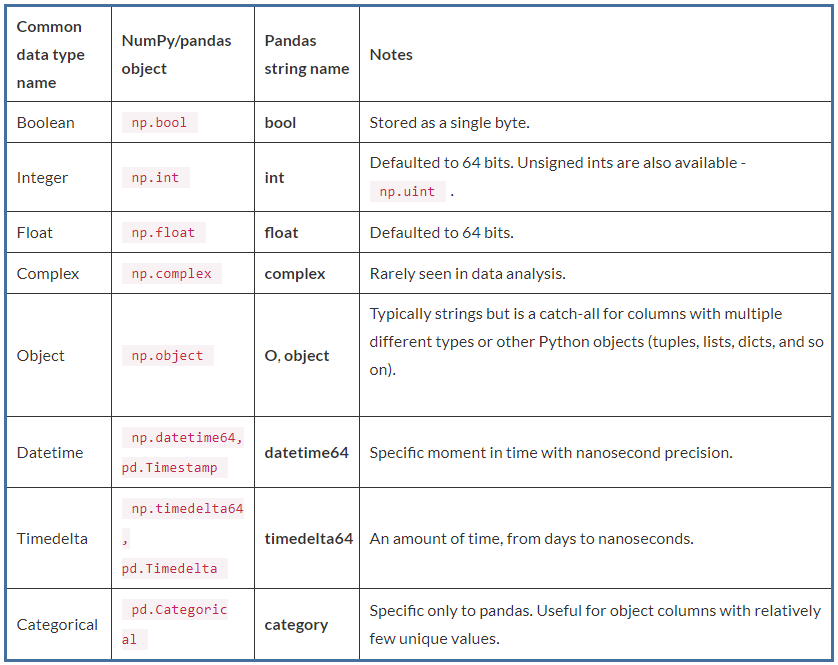

In [11]:
movie = pd.read_csv('data/movie.csv')

In [12]:
movie.dtypes

color                       object
director_name               object
num_critic_for_reviews     float64
duration                   float64
director_facebook_likes    float64
                            ...   
title_year                 float64
actor_2_facebook_likes     float64
imdb_score                 float64
aspect_ratio               float64
movie_facebook_likes         int64
Length: 28, dtype: object

In [13]:
movie.get_dtype_counts()

float64    13
int64       3
object     12
dtype: int64

`Each DataFrame column must be exactly one type`. For instance, every value in the column aspect_ratio is a 64-bit float, and every value in movie_facebook_likes is a 64-bit integer. Pandas defaults its core numeric types, integers, and floats to 64 bits regardless of the size necessary for all data to fit in memory. Even if a column consists entirely of the integer value 0, the data type will still be int64. get_dtype_counts is a convenience method for directly returning the count of all the data types in the DataFrame.

**Note**

* `Homogeneous data is another term for referring to columns that all have the same type. DataFrames as a whole may contain heterogeneous data of different data types for different columns.`

`The object data type, is the one data type that is unlike the others. A column that is of object data type may contain values that are of any valid Python object. Typically, when a column is of the object data type, it signals that the entire column is strings. This isn't necessarily the case as it is possible for these columns to contain a mixture of integers, booleans, strings, or other, even more complex Python objects such as lists or dictionaries. The object data type is a catch-all for columns that pandas doesn’t recognize as any other specific type.`

# Selecting a single Series

`A Series is a single column of data from a DataFrame. It is a single dimension of data, composed of just an index and the data.`

In [14]:
movie = pd.read_csv('data/movie.csv')

In [15]:
movie['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

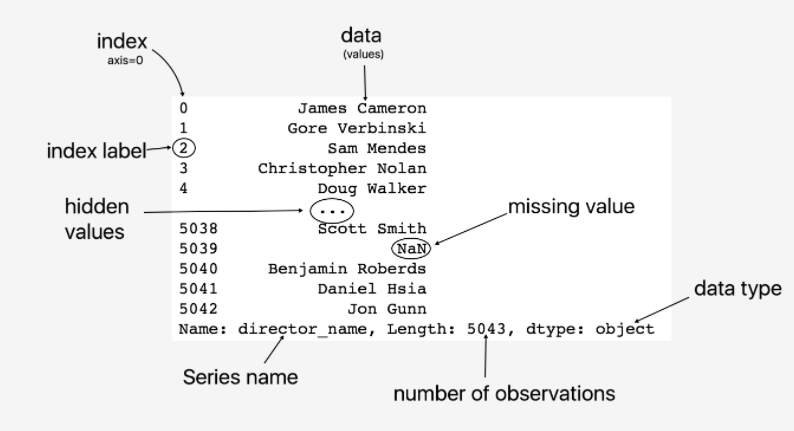

In [16]:
type(movie['director_name'])

pandas.core.series.Series

Python has several built-in objects for containing data, such as lists, tuples, and dictionaries. All three of these objects use the indexing operator to select their data. DataFrames are more powerful and complex containers of data, but they too use the indexing operator as the primary means to select data. Passing a single string to the DataFrame indexing operator returns a Series.

The visual output of the Series is less stylized than the DataFrame. It represents a single column of data. Along with the index and values, the output displays the name, length, and data type of the Series.

* Alternatively, while not recommended and subject to error, a column of data may be accessed using the dot notation with the column name as an attribute. Although it works with this particular example, it is not best practice and is prone to error and misuse. Column names with spaces or special characters cannot be accessed in this manner. This operation would have failed if the column name was director name. Column names that collide with DataFrame methods, such as count, also fail to be selected correctly using the dot notation. Assigning new values or deleting columns with the dot notation might give unexpected results. Because of this, using the dot notation to access columns should be avoided with production code.


Why would anyone ever use the dot notation syntax if it causes trouble? Programmers are lazy, and there are fewer characters to type. But mainly, it is extremely handy when you want to have the autocomplete intelligence available. For this reason, column selection by dot notation will sometimes be used in this course. The autocomplete intelligence is fantastic for helping you become aware of all the possible attributes and methods available to an object.

The intelligence will fail to work when attempting to chain an operation after use of the indexing operator from step 1 but will continue to work with the dot notation from step 2. The following screenshot shows the pop-up window that appears after the selection of the director_name with the dot notation. All the possible attributes and methods will appear in a list after pressing Tab following the dot:

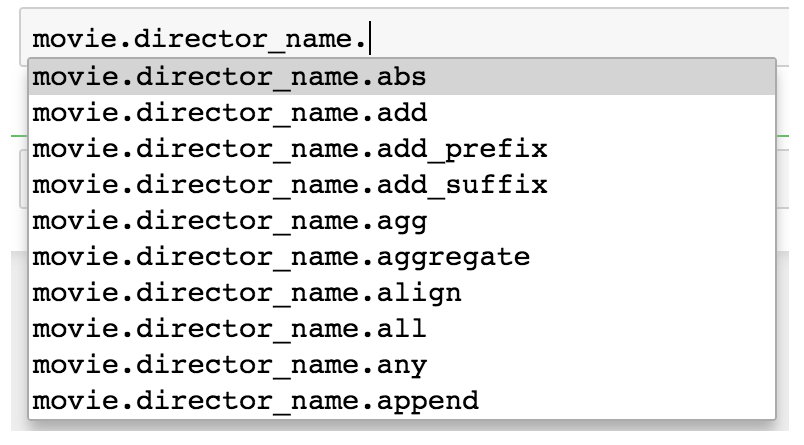

**Note**

* In a Jupyter notebook, when holding down Shift + Tab with the cursor placed somewhere in the object, a window of the docsstrings will pop out making the method far easier to use. This intelligence again disappears if you try to chain an operation after selecting a column with the indexing operator.


In [17]:
director = movie['director_name'] # save Series to variable
director.name

'director_name'

In [18]:
director.to_frame().head()

,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker


# Calling Series methods

Utilizing the single-dimensional Series is an integral part of all data analysis with pandas. A typical workflow will have you going back and forth between executing statements on Series and DataFrames. Calling Series methods is the primary way to use the abilities that the Series offers.


## Getting ready...

Both Series and DataFrames have a tremendous amount of power. We can use the dir function to uncover all the attributes and methods of a Series. Additionally, we can find the number of attributes and methods common to both Series and DataFrames. Both of these objects share the vast majority of attribute and method names:

In [17]:
#series attrubutes
s_attr_methods = set(dir(pd.Series))
len(s_attr_methods)

417

In [18]:
#dataframe attrubutes
df_attr_methods = set(dir(pd.DataFrame))
len(df_attr_methods)

435

In [19]:
#common series and dataframe attributes
len(s_attr_methods & df_attr_methods)

361

## How to do it...

After reading in the movies dataset, let's select two Series with different data types. The director_name column contains strings, formally an object data type, and the column actor_1_facebook_likes contains numerical data, formally float64:

In [20]:
movie = pd.read_csv('data/movie.csv')

In [21]:
director = movie['director_name']
actor_1_fb_likes = movie['actor_1_facebook_likes']

In [22]:
director.head()

0        James Cameron
1       Gore Verbinski
2           Sam Mendes
3    Christopher Nolan
4          Doug Walker
Name: director_name, dtype: object

In [23]:
actor_1_fb_likes.head()

0     1000.0
1    40000.0
2    11000.0
3    27000.0
4      131.0
Name: actor_1_facebook_likes, dtype: float64

The data type of the Series usually determines which of the methods will be the most useful. For instance, one of the most useful methods for the object data type Series is value_counts, which counts all the occurrences of each unique value:

In [25]:
with pd.option_context('display.max_rows', 8):
    display(director.value_counts())

director_name
Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
                    ..
Luca Guadagnino      1
Sam Fell             1
Dan Fogelman         1
Daniel Hsia          1
Name: count, Length: 2397, dtype: int64

The value_counts method is typically more useful for Series with object data types but can occasionally provide insight into numeric Series as well. Used with actor_1_fb_likes, it appears that higher numbers have been rounded to the nearest thousand as it is unlikely that so many movies received exactly 1,000 likes:

In [26]:
pd.set_option('display.max_rows', 8)
actor_1_fb_likes.value_counts()

actor_1_facebook_likes
1000.0     436
11000.0    206
2000.0     189
3000.0     150
          ... 
208.0        1
79.0         1
269.0        1
291.0        1
Name: count, Length: 877, dtype: int64

In [27]:
director.size

4916

In [28]:
director.shape

(4916,)

In [29]:
len(director)

4916

In [30]:
director.count() # Return number of non-NA/null observations in the Series

4814

In [31]:
actor_1_fb_likes.count()

4909

In [32]:
actor_1_fb_likes.quantile() #Return value at the given quantile (in percentile, default = 0.5)

982.0

In [33]:
actor_1_fb_likes.quantile(.2)

510.0

In [34]:
actor_1_fb_likes.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1      240.0
0.2      510.0
0.3      694.0
0.4      854.0
        ...   
0.6     1000.0
0.7     8000.0
0.8    13000.0
0.9    18000.0
Name: actor_1_facebook_likes, Length: 9, dtype: float64

In [35]:
actor_1_fb_likes.min()

0.0

In [36]:
actor_1_fb_likes.max()

640000.0

In [37]:
actor_1_fb_likes.mean()

6494.488490527602

In [38]:
actor_1_fb_likes.median()

982.0

In [39]:
actor_1_fb_likes.std()

15106.986883848309

In [40]:
actor_1_fb_likes.sum()

31881444.0

In [42]:
actor_1_fb_likes.describe() #describe the entire series. Gives us count, mean, std, min, max, etc.,

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [44]:
director.isnull() #check if there are any null values

0       False
1       False
2       False
3       False
        ...  
4912     True
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

In [45]:
director.isnull().sum() #count total number of missing values

102

In [47]:
actor_1_fb_likes_filled = actor_1_fb_likes.fillna(0) # Fill all the NA/NaN values with 0, 
#it's possible to do forward/backward fill, fill with mean, median, or infact any other value. 
#It's compleply depends on the problem we are solving
actor_1_fb_likes_filled.count()

4916

In [48]:
actor_1_fb_likes_dropped = actor_1_fb_likes.dropna() # drops the rows with NA/NaN values
actor_1_fb_likes_dropped.size

4909

### Pandas allows us to do inplace operations without the need for assigning to varaible again

In [49]:
actor_1_fb_likes.dropna(inplace=True) # drops the rows with NA/NaN values
actor_1_fb_likes_dropped.size

4909

In [51]:
#After dropping if in case we need to reset the index we can use

actor_1_fb_likes.dropna(inplace=True, ignore_index=False) # drops the rows with NA/NaN values
actor_1_fb_likes_dropped.size

4909

In [52]:
actor_1_fb_likes

0        1000.0
1       40000.0
2       11000.0
3       27000.0
         ...   
4912      841.0
4913        0.0
4914      946.0
4915       86.0
Name: actor_1_facebook_likes, Length: 4909, dtype: float64

## There's more...
The value_counts method is one of the most informative Series methods and heavily used during exploratory analysis, especially with categorical columns. It defaults to returning the counts, but by setting the normalize parameter to True, the relative frequencies are returned instead, which provides another view of the distribution:



In [54]:
director.value_counts() #count number of times a value appeared in the series

director_name
Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
                    ..
Luca Guadagnino      1
Sam Fell             1
Dan Fogelman         1
Daniel Hsia          1
Name: count, Length: 2397, dtype: int64

In [55]:
director.value_counts(normalize=True) #to get the percentage of counts, we can use normalize=True

director_name
Steven Spielberg    0.005401
Woody Allen         0.004570
Martin Scorsese     0.004155
Clint Eastwood      0.004155
                      ...   
Luca Guadagnino     0.000208
Sam Fell            0.000208
Dan Fogelman        0.000208
Daniel Hsia         0.000208
Name: proportion, Length: 2397, dtype: float64

In [56]:
director.hasnans # check whether the series has NaN values or not

True

In [57]:
director.notnull()

0        True
1        True
2        True
3        True
        ...  
4912    False
4913     True
4914     True
4915     True
Name: director_name, Length: 4916, dtype: bool

In [59]:
director.describe() #if our column was numerical we will get min, max, count etc. Here our column is categorical

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

# Working with operators on a Series

There exist a vast number of operators in Python for manipulating objects. Operators are not objects themselves, but rather syntactical structures and keywords that force an operation to occur on an object. For instance, when the plus operator is placed between two integers, Python will add them together. See more examples of operators in the following code:

In [60]:
pd.options.display.max_rows = 6

In [68]:
movie = pd.read_csv('data/movie.csv')
imdb_score = movie['imdb_score']
imdb_score

0       7.9
1       7.1
2       6.8
       ... 
4913    6.3
4914    6.3
4915    6.6
Name: imdb_score, Length: 4916, dtype: float64

In [69]:
imdb_score + 1 # adds 1 to all the values of rows

0       8.9
1       8.1
2       7.8
       ... 
4913    7.3
4914    7.3
4915    7.6
Name: imdb_score, Length: 4916, dtype: float64

`The other basic arithmetic operators minus (-), multiplication (*), division (/), and exponentiation (**) work similarly with scalar values. In this step, we will multiply the series by 2.5:`

In [70]:
imdb_score * 2.5

0       19.75
1       17.75
2       17.00
        ...  
4913    15.75
4914    15.75
4915    16.50
Name: imdb_score, Length: 4916, dtype: float64

Python uses two consecutive division operators (//) for floor division and the percent sign (%) for the modulus operator, which returns the remainder after a division. Series use these the same way:


In [71]:
imdb_score // 7 # floor division

0       1.0
1       1.0
2       0.0
       ... 
4913    0.0
4914    0.0
4915    0.0
Name: imdb_score, Length: 4916, dtype: float64

There exist six comparison operators, greater than (>), less than (<), greater than or equal to (>=), less than or equal to (<=), equal to (==), and not equal to (!=). Each comparison operator turns each value in the Series to True or False based on the outcome of the condition:

In [72]:
imdb_score > 7

0        True
1        True
2       False
        ...  
4913    False
4914    False
4915    False
Name: imdb_score, Length: 4916, dtype: bool

In [74]:
director = movie['director_name'] #Extract a director_name series from movie data frame

In [76]:
director == 'James Cameron' #check if a series value is James Cameron

0        True
1       False
2       False
        ...  
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

`All the operators used in this recipe apply the same operation to each element in the Series. In native Python, this would require a for-loop to iterate through each of the items in the sequence before applying the operation. Pandas relies heavily on the NumPy library, which allows for vectorized computations, or the ability to operate on entire sequences of data without the explicit writing of for loops. Each operation returns a Series with the same index, but with values that have been modified by the operator.`



All of the operators used in this recipe have method equivalents that produce the exact same result. For instance, in step 1, imdb_score + 1 may be reproduced with the add method. Check the following code to see the method version of each step in the recipe:



In [77]:
imdb_score.add(1)              # imdb_score + 1

0       8.9
1       8.1
2       7.8
       ... 
4913    7.3
4914    7.3
4915    7.6
Name: imdb_score, Length: 4916, dtype: float64

In [78]:
imdb_score.mul(2.5)            # imdb_score * 2.5

0       19.75
1       17.75
2       17.00
        ...  
4913    15.75
4914    15.75
4915    16.50
Name: imdb_score, Length: 4916, dtype: float64

In [79]:
imdb_score.floordiv(7)         # imdb_score // 7

0       1.0
1       1.0
2       0.0
       ... 
4913    0.0
4914    0.0
4915    0.0
Name: imdb_score, Length: 4916, dtype: float64

In [80]:
imdb_score.gt(7)               # imdb_score > 7

0        True
1        True
2       False
        ...  
4913    False
4914    False
4915    False
Name: imdb_score, Length: 4916, dtype: bool

In [81]:
director.eq('James Cameron')   # director == 'James Cameron'

0        True
1       False
2       False
        ...  
4913    False
4914    False
4915    False
Name: director_name, Length: 4916, dtype: bool

`Why does pandas offer a method equivalent to these operators? By its nature, an operator only operates in exactly one manner. Methods, on the other hand, can have parameters that allow you to alter their default functionality:`

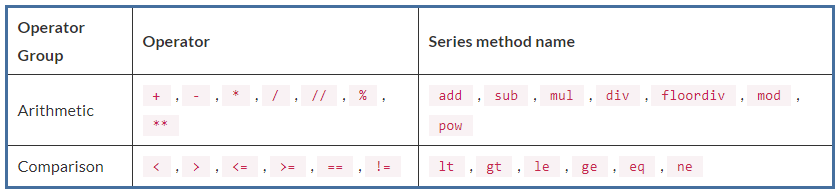

counters an operator. For example, how does the expression imdb_score * 2.5 know to multiply each element in the Series by 2.5? Python has a built-in, standardized way for objects to communicate with operators using special methods. 

Special methods are what objects call internally whenever they encounter an operator. Special methods are defined in the Python data model, a very important part of the official documentation, and are the same for every object throughout the language. Special methods always begin and end with two underscores. For instance, the special method _ _mul_ _ is called whenever the multiplication operator is used. 

Python interprets the imdb_score * 2.5 expression as imdb_score. __mul_ _(2.5).

There is no difference between using the special method and using an operator as they are doing the exact same thing. The operator is just syntactic sugar for the special method.

In [82]:
imdb_score.astype(int).mod(5)

0       2
1       2
2       1
       ..
4913    1
4914    1
4915    1
Name: imdb_score, Length: 4916, dtype: int32

# Chaining Series methods together

In Python, every variable is an object, and all objects have attributes and methods that refer to or return more objects. `The sequential invocation of methods using the dot notation is referred to as method chaining. Pandas is a library that lends itself well to method chaining, as many Series and DataFrame methods return more Series and DataFrames, upon which more methods can be called. `

To motivate method chaining, let's take a simple English sentence and translate the chain of events into a chain of methods. Consider the sentence, A person drives to the store to buy food, then drives home and prepares, cooks, serves, and eats the food before cleaning the dishes.

A Python version of this sentence might take the following form:

`person.buy('food').drive('home').prepare('food').cook('food').serve('food').eat('food').cleanup('dishes')`
          
* In the preceding code, the person is the object calling each of the methods, just as the person is performing all of the actions in the original sentence. The parameter passed to each of the methods specifies how the method operates.

Although it is possible to write the entire method chain in a single unbroken line, it is far more palatable to write a single method per line. Since Python does not normally allow a single expression to be written on multiple lines, you need to use the backslash line continuation character. Alternatively, you may wrap the whole expression in parentheses. To improve readability even more, place each method directly under the dot above it. This recipe shows similar method chaining with pandas Series.

In [83]:
movie = pd.read_csv('data/movie.csv')
actor_1_fb_likes = movie['actor_1_facebook_likes']
director = movie['director_name']

One of the most common methods to append to the chain is the head method. This suppresses long output. For shorter chains, there isn't as great a need to place each method on a different line:

In [85]:
director.value_counts().head(3) #get top 3 value counts

director_name
Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Name: count, dtype: int64

`A common way to count the number of missing values is to chain the sum method after isnull:`

In [86]:
actor_1_fb_likes.isnull().sum()

7

`All the non-missing values of actor_1_fb_likes should be integers as it is impossible to have a partial Facebook like. Any numeric columns with missing values must have their data type as float. If we fill missing values from actor_1_fb_likes with zeros, we can then convert it to an integer with the astype method:`

In [87]:
actor_1_fb_likes.dtype

dtype('float64')

In [88]:
actor_1_fb_likes.fillna(0).astype(int).head() #fill all missing values with 0, convert the series to int and then get top 5

0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int32

Method chaining is possible with all Python objects since each object method must return another object that itself will have more methods. It is not necessary for the method to return the same type of object.

Step 2 first uses value_counts to return a Series and then chains the head method to select the first three elements. The final returned object is a Series, which could also have had more methods chained on it.

In step 3, the isnull method creates a boolean Series. Pandas numerically evaluates False/True as 0/1, so the sum method returns the number of missing values.

Each of the three chained methods in step 4 returns a Series. It may not seem intuitive, but the astype method returns an entirely new Series with a different data type

In [89]:
actor_1_fb_likes.isnull().mean() 

0.0014239218877135883

As it was mentioned at the beginning of the recipe, it is possible to use parentheses instead of the backslash for multi-line code.

In [90]:
(actor_1_fb_likes.fillna(0)
                 .astype(int)
                 .head())

0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int32

# Making a meaningful index

The index of a DataFrame provides a label for each of the rows. If no index is explicitly provided upon DataFrame creation, then by default, a RangeIndex is created with labels as integers from 0 to n-1, where n is the number of rows.

In [91]:
movie = pd.read_csv('data/movie.csv')

In [92]:
movie.shape

(4916, 28)

In [93]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0


`This recipe replaces the meaningless default row index of the movie dataset with the movie title, which is much more meaningful.`

In [94]:
movie2 = movie.set_index('movie_title')
movie2

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
...,...,...,...,...,...,...,...,...,...
A Plague So Pleasant,Color,Benjamin Roberds,13.0,76.0,...,0.0,6.3,NaN,16
Shanghai Calling,Color,Daniel Hsia,14.0,100.0,...,719.0,6.3,2.35,660
My Date with Drew,Color,Jon Gunn,43.0,90.0,...,23.0,6.6,1.85,456


In [95]:
pd.read_csv('data/movie.csv', index_col='movie_title') # We can do the above in just a single line

,color,director_name,num_critic_for_reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
...,...,...,...,...,...,...,...,...,...
A Plague So Pleasant,Color,Benjamin Roberds,13.0,76.0,...,0.0,6.3,NaN,16
Shanghai Calling,Color,Daniel Hsia,14.0,100.0,...,719.0,6.3,2.35,660
My Date with Drew,Color,Jon Gunn,43.0,90.0,...,23.0,6.6,1.85,456


A meaningful index is one that clearly identifies each row. The default RangeIndex is not very helpful. Since each row identifies data for exactly one movie, it makes sense to use the movie title as the label. If you know ahead of time which column will make a good index, you can specify this upon import with the index_col parameter of the read_csv function.

`By default, both set_index and read_csv drop the column used as the index from the DataFrame. With set_index, it is possible to keep the column in the DataFrame by setting the drop parameter to False.`



# There's more...
Conversely, it is possible to turn the index into a column with the reset_index method. This will make movie_title a column again and revert the index back to a RangeIndex. reset_index always puts the column as the very first one in the DataFrame, so the columns may not be in their original order:

In [96]:
movie2.reset_index()

,movie_title,color,director_name,num_critic_for_reviews,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Avatar,Color,James Cameron,723.0,...,936.0,7.9,1.78,33000
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,...,5000.0,7.1,2.35,0
2,Spectre,Color,Sam Mendes,602.0,...,393.0,6.8,2.35,85000
...,...,...,...,...,...,...,...,...,...
4913,A Plague So Pleasant,Color,Benjamin Roberds,13.0,...,0.0,6.3,NaN,16
4914,Shanghai Calling,Color,Daniel Hsia,14.0,...,719.0,6.3,2.35,660
4915,My Date with Drew,Color,Jon Gunn,43.0,...,23.0,6.6,1.85,456


# Renaming row and column labels

One of the most basic and common operations on a DataFrame is to rename the row or column names. Good column names are descriptive, brief, and follow a common convention with respect to capitalization, spaces, underscores, and other features.



In [96]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [98]:
#Get all current movie dataframe column names
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [99]:
#to get a list 
movie.columns.tolist()

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [ ]:
#If we were to rename all dataframe columns we can just pass a list of column names
#movie.columns = [your list]

The above is very inefficient if we were to change just one for 2 columns names from hundred or so

`The rename DataFrame method accepts dictionaries that map the old value to the new value. Let's create one for the rows and another for the columns:`


In [100]:
indexes_renamed = {'Avatar':'Ratava', 'Spectre': 'Ertceps'} 
columns_renamed = {'director_name':'Director Name', 
                       'num_critic_for_reviews': 'Critical Reviews'} 

In [101]:
movie.rename(index=indexes_renamed, columns=columns_renamed).head()

,color,Director Name,Critical Reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,
Ratava,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Ertceps,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0


The rename DataFrame method allows for both row and column labels to be renamed at the same time with the index and columns parameters. Each of these parameters may be set to a dictionary that maps old labels to their new values.

# There's more
There are multiple ways to rename row and column labels. It is possible to reassign the index and column attributes directly to a Python list. This assignment works when the list has the same number of elements as the row and column labels. The following code uses the `tolist` method on each Index object to create a Python list of labels. It then modifies a couple values in the list and reassigns the list to the attributes index and columns:

In [102]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
index = movie.index
columns = movie.columns

index_list = index.tolist()
column_list = columns.tolist()

index_list[0] = 'Ratava'
index_list[2] = 'Ertceps'
column_list[1] = 'Director Name'
column_list[2] = 'Critical Reviews'

In [103]:
print(index_list[:5])

['Ratava', "Pirates of the Caribbean: At World's End", 'Ertceps', 'The Dark Knight Rises', 'Star Wars: Episode VII - The Force Awakens']


In [104]:
print(column_list)

['color', 'Director Name', 'Critical Reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [105]:
movie.index = index_list
movie.columns = column_list

In [106]:
movie.head()

,color,Director Name,Critical Reviews,duration,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Ratava,Color,James Cameron,723.0,178.0,...,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,...,5000.0,7.1,2.35,0
Ertceps,Color,Sam Mendes,602.0,148.0,...,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,...,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,...,12.0,7.1,NaN,0


# Creating and deleting columns

During a data analysis, it is extremely likely that you will need to create new columns to represent new variables. Commonly, these new columns will be created from previous columns already in the dataset. Pandas has a few different ways to add new columns to a DataFrame.

In [107]:
movie = pd.read_csv('data/movie.csv')

The simplest way to create a new column is to assign it a scalar value. Place the name of the new column as a string into the indexing operator. Let's create the has_seen column in the movie dataset to indicate whether or not we have seen the movie. We will assign zero for every value. By default, new columns are appended to the end:

In [108]:
movie['has_seen'] = 0

In [109]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'has_seen'],
      dtype='object')

There are several columns that contain data on the number of Facebook likes. Let's add up all the actor and director Facebook likes and assign them to the actor_director_facebook_likes column:

In [110]:
movie['actor_director_facebook_likes'] = (movie['actor_1_facebook_likes'] + 
                                              movie['actor_2_facebook_likes'] + 
                                              movie['actor_3_facebook_likes'] + 
                                              movie['director_facebook_likes'])

`From the Calling Series method recipe in this chapter, we know that this dataset contains missing values. When numeric columns are added to one another as in the preceding step, pandas defaults missing values to zero. But, if all values for a particular row are missing, then pandas keeps the total as missing as well. Let's check if there are missing values in our new column and fill them with 0:`

In [111]:
movie['actor_director_facebook_likes'].isnull().sum()

122

In [112]:
movie['actor_director_facebook_likes'] = movie['actor_director_facebook_likes'].fillna(0)

There is another column in the dataset named cast_total_facebook_likes. It would be interesting to see what percentage of this column comes from our newly created column, actor_director_facebook_likes. Before we create our percentage column, let's do some basic data validation. Let's ensure that cast_total_facebook_likes is greater than or equal to actor_director_facebook_likes

In [113]:
movie['is_cast_likes_more'] = (movie['cast_total_facebook_likes'] >= 
                                  movie['actor_director_facebook_likes'])

is_cast_likes_more is now a column of boolean values. We can check whether all the values of this column are True with the all Series method:

In [114]:
movie['is_cast_likes_more'].all()

False

It turns out that there is at least one movie with more actor_director_facebook_likes than cast_total_facebook_likes. It could be that director Facebook likes are not part of the cast total likes. `Let's backtrack and delete column actor_director_facebook_likes:`

In [115]:
movie = movie.drop('actor_director_facebook_likes', axis='columns')

In [116]:
movie['actor_total_facebook_likes'] = (movie['actor_1_facebook_likes'] + 
                                       movie['actor_2_facebook_likes'] + 
                                       movie['actor_3_facebook_likes'])

movie['actor_total_facebook_likes'] = movie['actor_total_facebook_likes'].fillna(0)

Check again whether all the values in cast_total_facebook_likes are greater than the actor_total_facebook_likes:

In [117]:
movie['is_cast_likes_more'] = movie['cast_total_facebook_likes'] >= \
                                  movie['actor_total_facebook_likes']
    
movie['is_cast_likes_more'].all()

True

Finally, let's calculate the percentage of the cast_total_facebook_likes that come from actor_total_facebook_likes:

In [118]:
movie['pct_actor_cast_like'] = (movie['actor_total_facebook_likes'] / 
                                movie['cast_total_facebook_likes'])

Let's validate that the min and max of this column fall between 0 and 1:

In [119]:
movie['pct_actor_cast_like'].min(), movie['pct_actor_cast_like'].max() 

(0.0, 1.0)

We can then output this column as a Series. First, we need to set the index to the movie title so we can properly identify each value.

In [120]:
movie.set_index('movie_title')['pct_actor_cast_like'].head()

movie_title
Avatar                                        0.577369
Pirates of the Caribbean: At World's End      0.951396
Spectre                                       0.987521
The Dark Knight Rises                         0.683783
Star Wars: Episode VII - The Force Awakens    0.000000
Name: pct_actor_cast_like, dtype: float64

Many pandas operations are flexible, and column creation is one of them. This recipe assigns both a scalar value, as seen in Step 1, and a Series, as seen in step 2, to create a new column.

Step 2 adds four different Series together with the plus operator. Step 3 uses method chaining to find and fill missing values. Step 4 uses the greater than or equal comparison operator to return a boolean Series, which is then evaluated with the all method in step 5 to check whether every single value is True or not.

The drop method accepts the name of the row or column to delete. It defaults to dropping rows by the index names. To drop columns you must set the axis parameter to either 1 or columns. The default value for axis is 0 or the string index.

Steps 7 and 8 redo the work of step 3 to step 5 without the director_facebook_likes column. Step 9 finally calculates the desired column we wanted since step 4. Step 10 validates that the percentages are between 0 and 1.

## There's more...

It is possible to insert a new column into a specific place in a DataFrame besides the end with the insert method. The insert method takes the integer position of the new column as its first argument, the name of the new column as its second, and the values as its third. You will need to use the get_loc Index method to find the integer location of the column name.

The insert method modifies the calling DataFrame in-place, so there won't be an assignment statement. The profit of each movie may be calculated by subtracting budget from gross and inserting it directly after gross with the following:

In [121]:
profit_index = movie.columns.get_loc('gross') + 1

In [122]:
movie.insert(2, 'profit', movie.gross - movie.budget)

In [123]:
movie

,color,director_name,profit,num_critic_for_reviews,...,has_seen,is_cast_likes_more,actor_total_facebook_likes,pct_actor_cast_like
0,Color,James Cameron,523505847.0,723.0,...,0,True,2791.0,0.577369
1,Color,Gore Verbinski,9404152.0,302.0,...,0,True,46000.0,0.951396
2,Color,Sam Mendes,-44925825.0,602.0,...,0,True,11554.0,0.987521
...,...,...,...,...,...,...,...,...,...
4913,Color,Benjamin Roberds,NaN,13.0,...,0,True,0.0,NaN
4914,Color,Daniel Hsia,NaN,14.0,...,0,True,2154.0,0.902766
4915,Color,Jon Gunn,84122.0,43.0,...,0,True,125.0,0.766871
